## Session 5 Exercises Solution

###  Import all required libraries and datasets

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute




## Solution 3

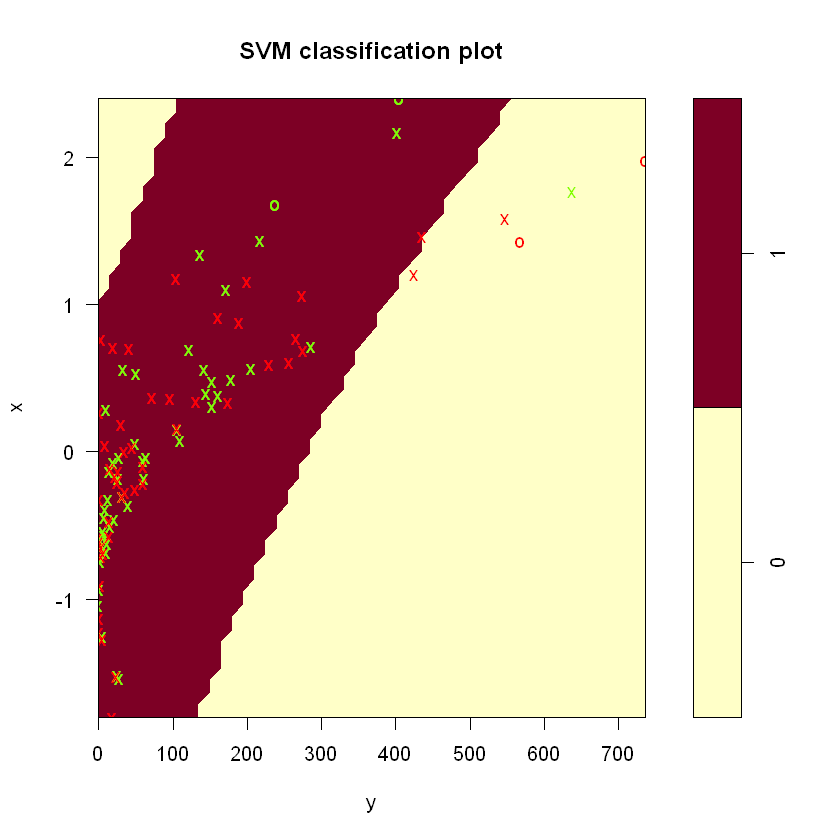

In [2]:
#Generate a simulated two-class data set with 100 observations and two features 
set.seed(1)
a<-sample(1:100,50)
x<-rnorm(100)
y<-rnorm(100)+(x+1)^2*a
z<-rep(0,100)
z[a]<-1
X<-rbind(x,y)
X<-t(X)
df<-data.frame(X,z=as.factor(z))
poly_fit<-svm(z~.,data = df,kernel="polynomial" ,degree=2)
plot(poly_fit,df, symbolPalette=rainbow(4))

## Solution 4

In [3]:
#Load the libraries
library(e1071)
library(ISLR)


In [4]:
#Read the data
attach(Auto)
head(Auto)

The following object is masked from package:ggplot2:

    mpg




,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


##  (a)

In [5]:
#Create Binary variable
med_gas = median(Auto$mpg)
gas_mileage_factors = ifelse(Auto$mpg > med_gas, 1, 0)
Auto$mpglevel = as.factor(gas_mileage_factors)

## (b)

In [6]:
#Fit a support vector classifier to the data
# Tuning parameter: cost
set.seed(1)
tune_auto <- tune(svm,mpglevel ~ ., data = Auto, kernel='linear',
                 ranges=list(cost=c(0.001, 0.01, 0.1, 1.5, 10, 100)))


In [7]:
#model summary
summary(tune_auto)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  1.5

- best performance: 0.01025641 

- Detailed performance results:
     cost      error dispersion
1   0.001 0.09442308 0.04519425
2   0.010 0.07653846 0.03617137
3   0.100 0.04596154 0.03378238
4   1.500 0.01025641 0.01792836
5  10.000 0.02051282 0.02648194
6 100.000 0.03076923 0.03151981


## (c)

In [8]:
#With radial and polynomial basis kernels
set.seed(1)
tune_auto = tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", 
                 ranges = list(cost = c(0.1, 1, 10, 100, 1000), 
                 degree = c(2, 3, 4)))

In [9]:
summary(tune_auto)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
 1000      2

- best performance: 0.2454487 

- Detailed performance results:
    cost degree     error dispersion
1  1e-01      2 0.5511538 0.04366593
2  1e+00      2 0.5511538 0.04366593
3  1e+01      2 0.5130128 0.08963366
4  1e+02      2 0.3013462 0.09961961
5  1e+03      2 0.2454487 0.11551451
6  1e-01      3 0.5511538 0.04366593
7  1e+00      3 0.5511538 0.04366593
8  1e+01      3 0.5511538 0.04366593
9  1e+02      3 0.3446154 0.09821588
10 1e+03      3 0.2528846 0.09383590
11 1e-01      4 0.5511538 0.04366593
12 1e+00      4 0.5511538 0.04366593
13 1e+01      4 0.5511538 0.04366593
14 1e+02      4 0.5511538 0.04366593
15 1e+03      4 0.5435897 0.05056569


In [10]:
# Tune cost and gamma for SVM
set.seed(1)
tune_auto <- tune(svm, mpglevel ~ ., data = Auto, kernel='radial',
                 ranges=list(cost=c(0.1, 1, 10, 100, 1000),  # List of cost values
                 gamma=c(0.5, 1, 2, 3, 4)))  # List of gamma values

In [11]:
summary(tune_auto)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.04865385 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-01   0.5 0.07910256 0.04234351
2  1e+00   0.5 0.05115385 0.02716416
3  1e+01   0.5 0.04865385 0.03075209
4  1e+02   0.5 0.05121795 0.03424201
5  1e+03   0.5 0.05121795 0.03424201
6  1e-01   1.0 0.55115385 0.04366593
7  1e+00   1.0 0.06384615 0.04375618
8  1e+01   1.0 0.05884615 0.04020934
9  1e+02   1.0 0.05884615 0.04020934
10 1e+03   1.0 0.05884615 0.04020934
11 1e-01   2.0 0.55115385 0.04366593
12 1e+00   2.0 0.14019231 0.07984711
13 1e+01   2.0 0.13512821 0.08055403
14 1e+02   2.0 0.13512821 0.08055403
15 1e+03   2.0 0.13512821 0.08055403
16 1e-01   3.0 0.55115385 0.04366593
17 1e+00   3.0 0.41326923 0.14331350
18 1e+01   3.0 0.38025641 0.14908523
19 1e+02   3.0 0.38025641 0.14908523
20 1e+03   3.0 0.38025641 0.14908523
21 1e-01   4.0 0.55115385 0.04366593
22

## (d)

In [12]:
?plot.svm

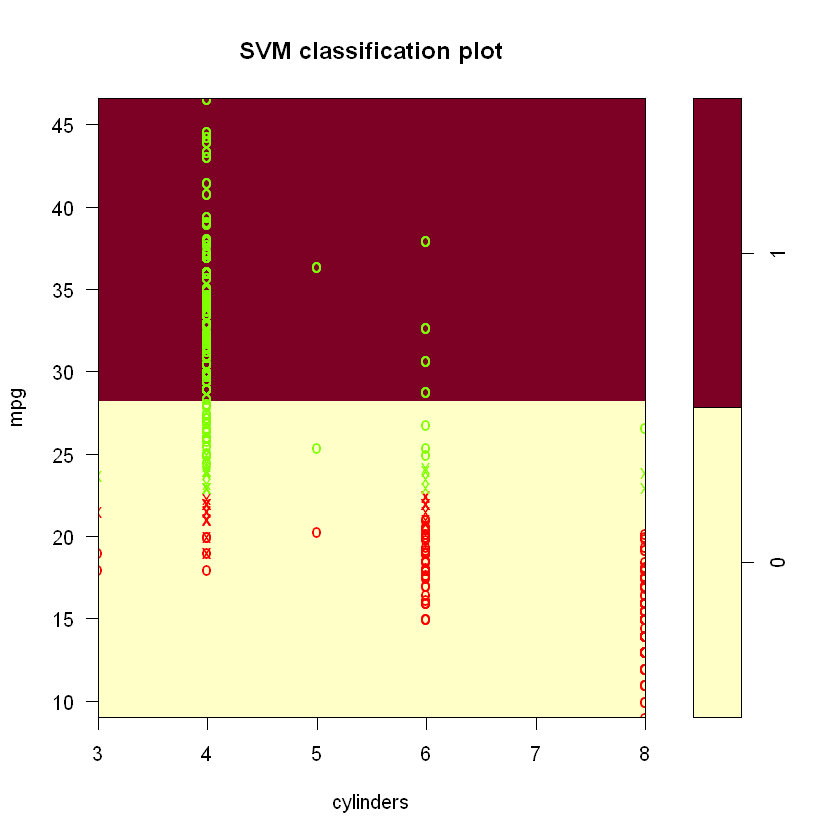

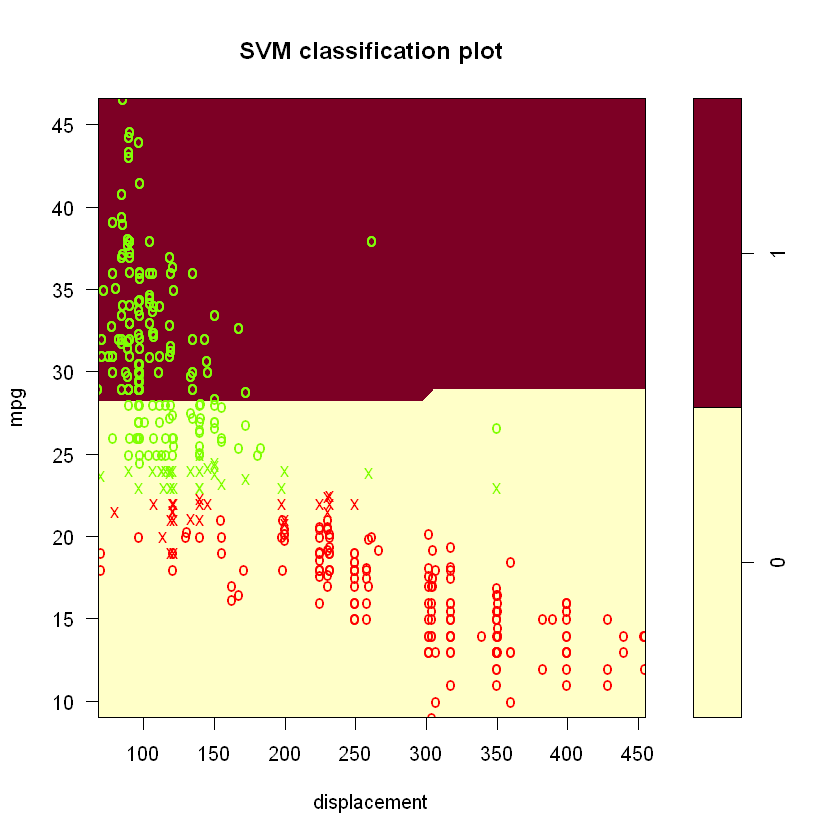

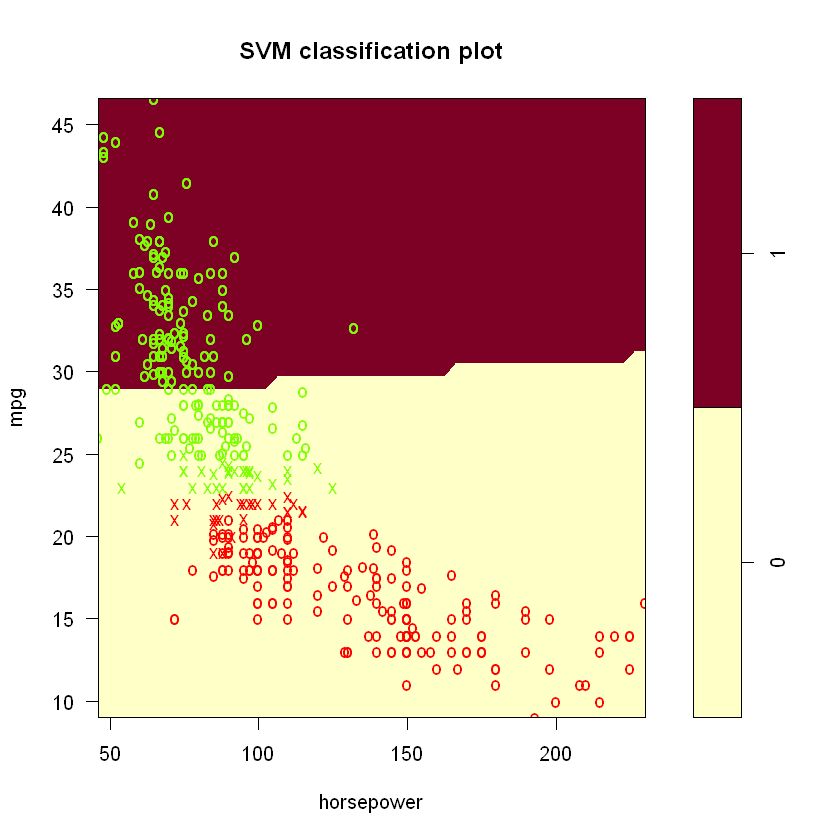

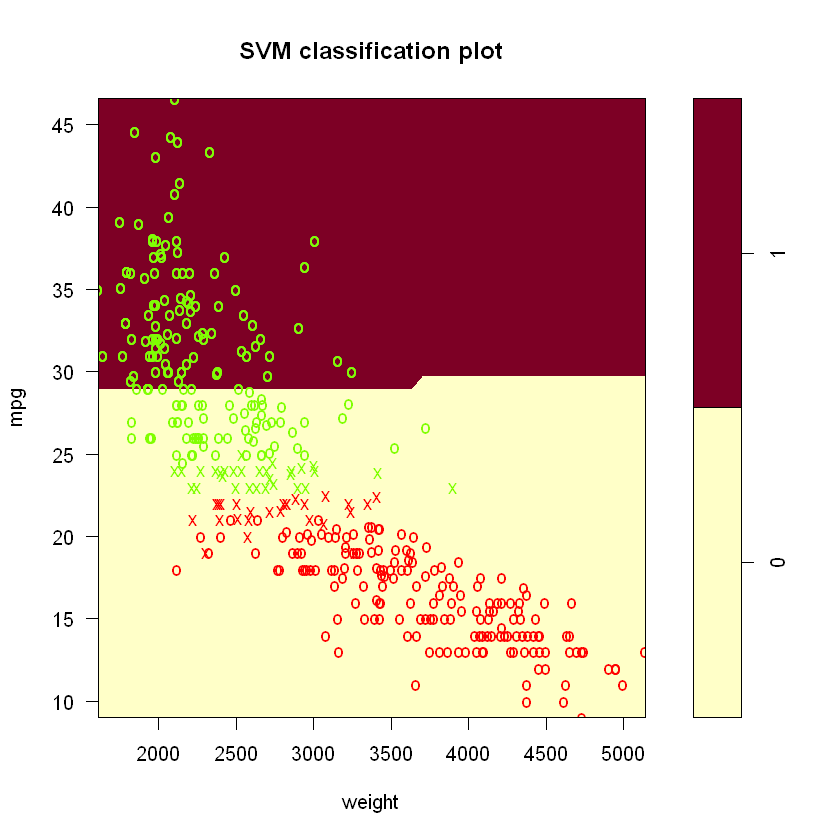

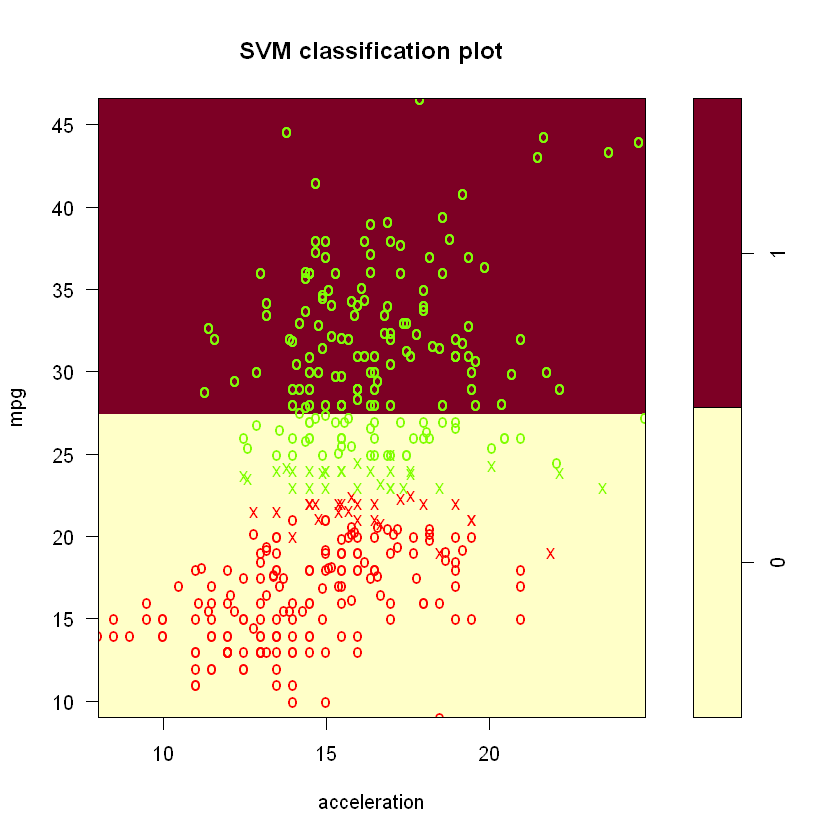

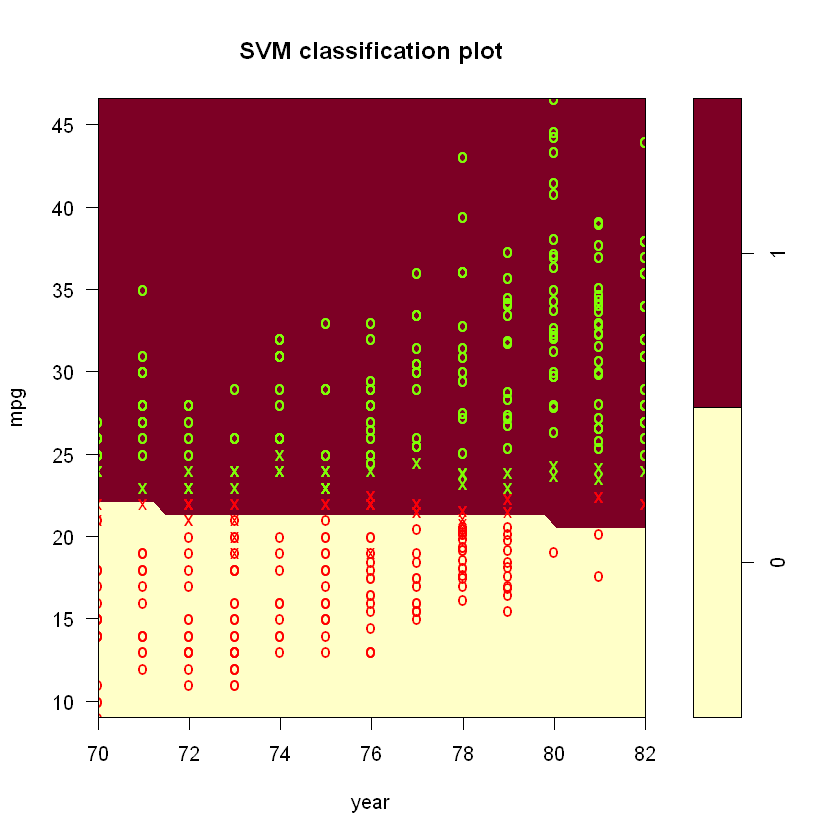

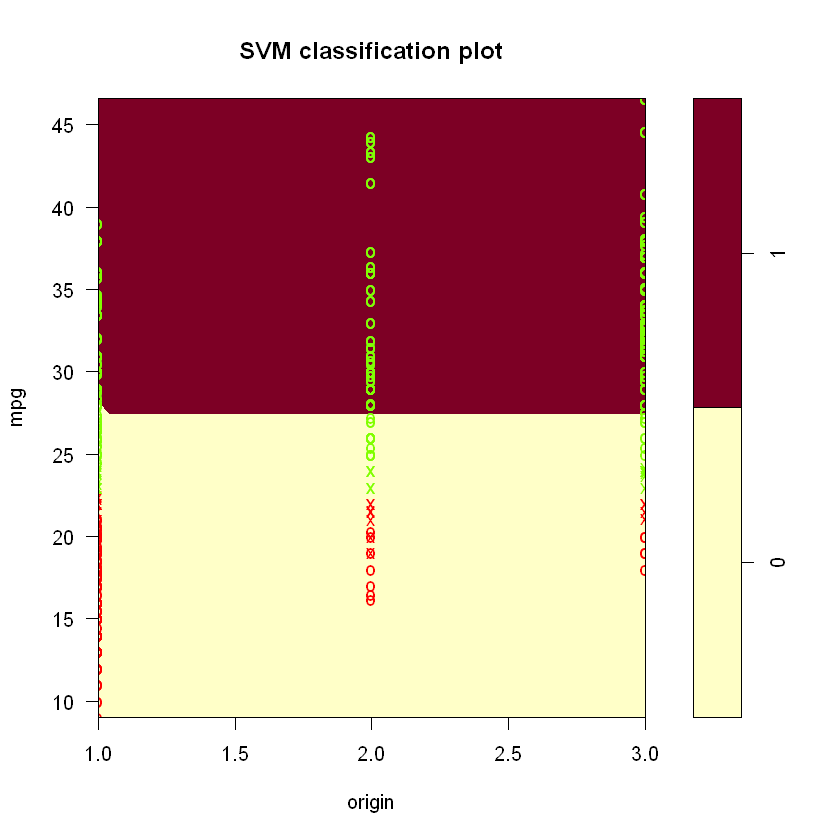

In [13]:
# plots to back up the assertions
#Ref: http://rstudio-pubs-static.s3.amazonaws.com/493067_1e961e77c20c47c4a8d13da14dd78766.html
svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, 
    degree = 2)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, symbolPalette=rainbow(4),as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

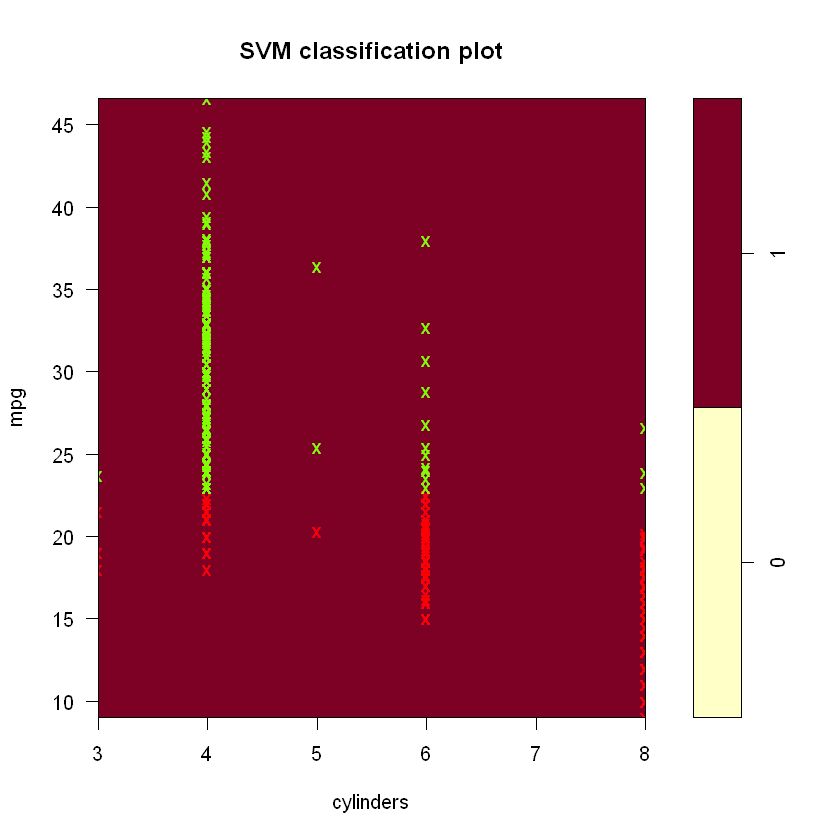

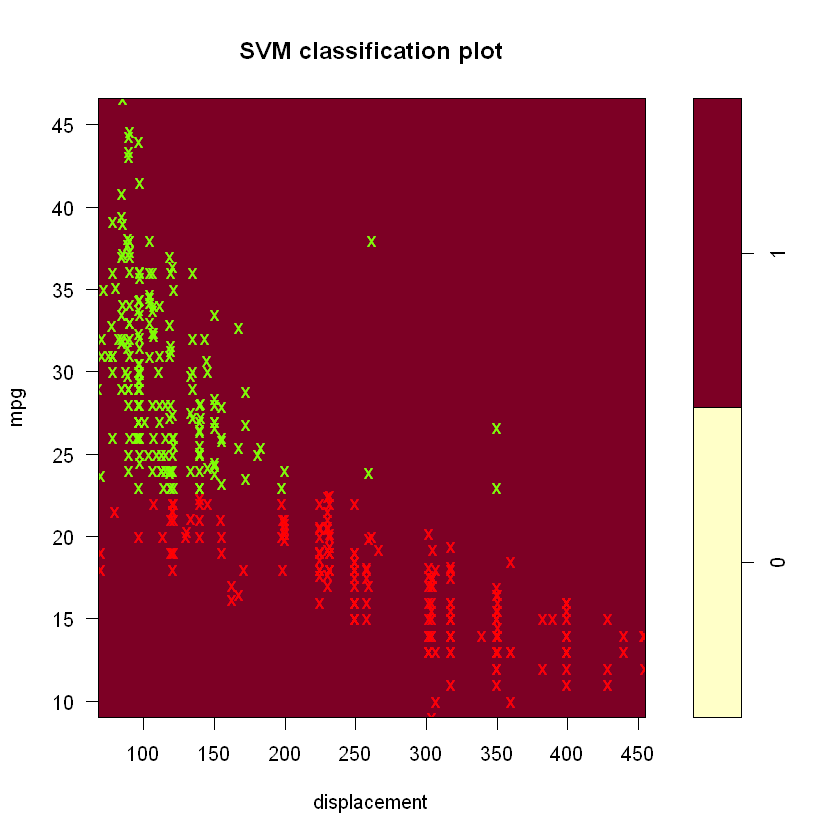

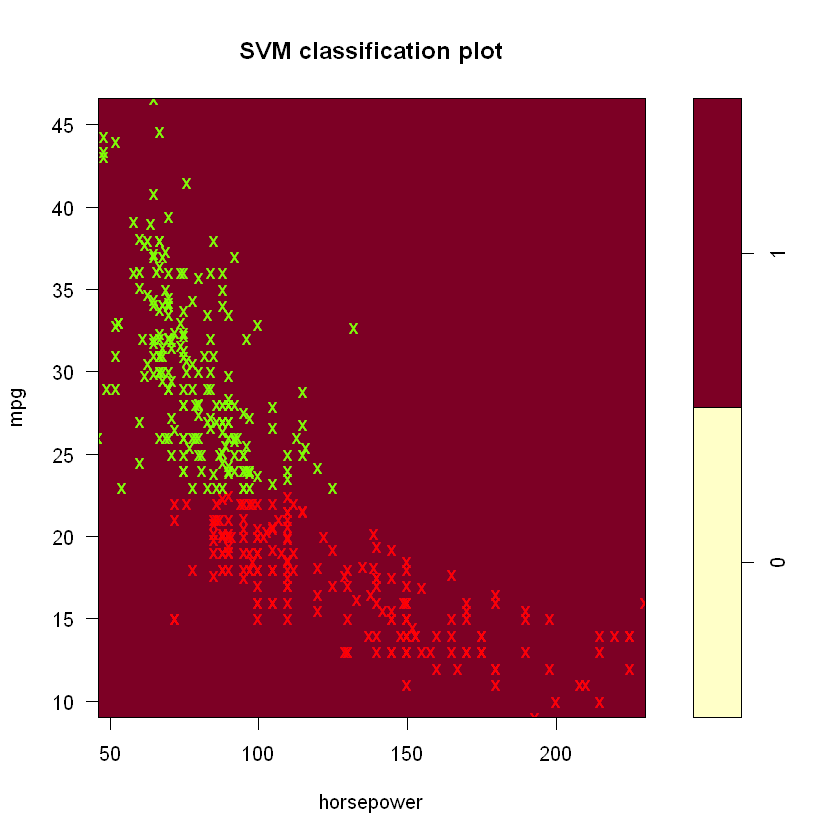

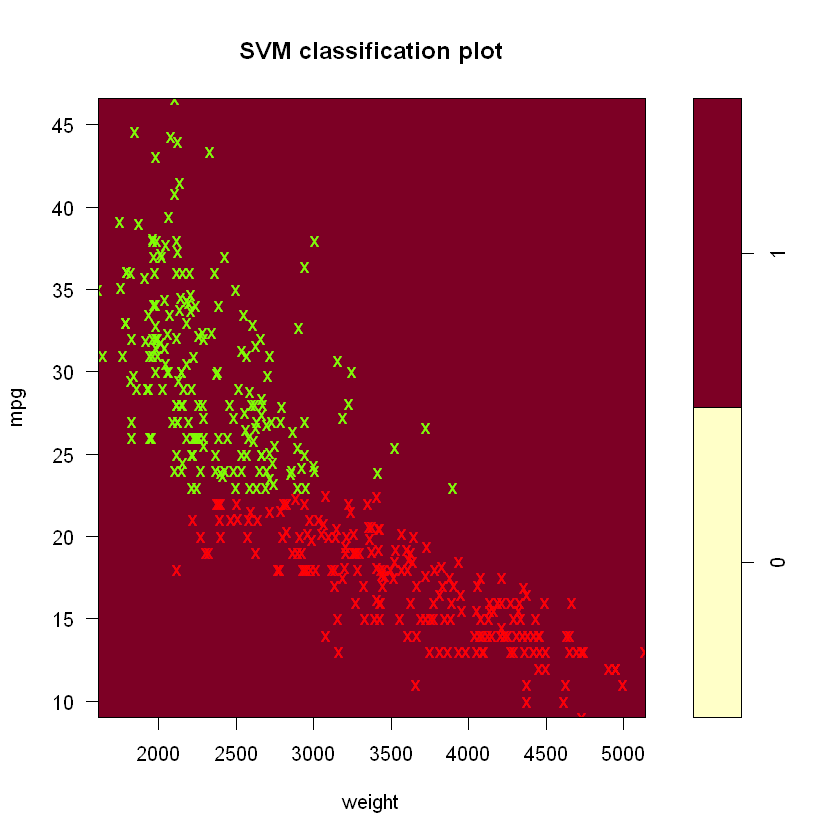

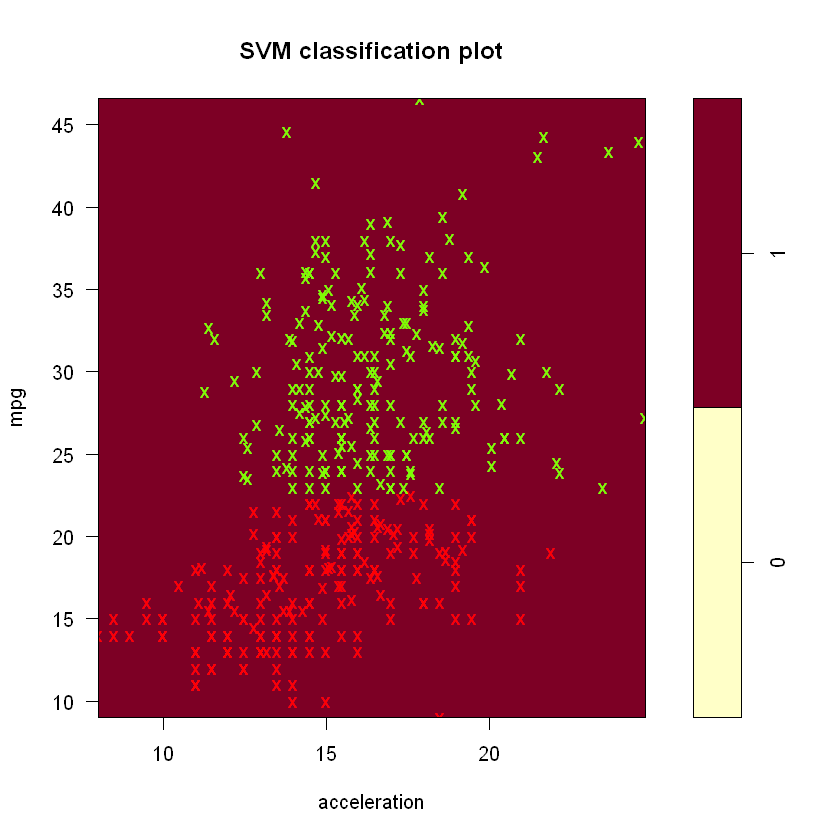

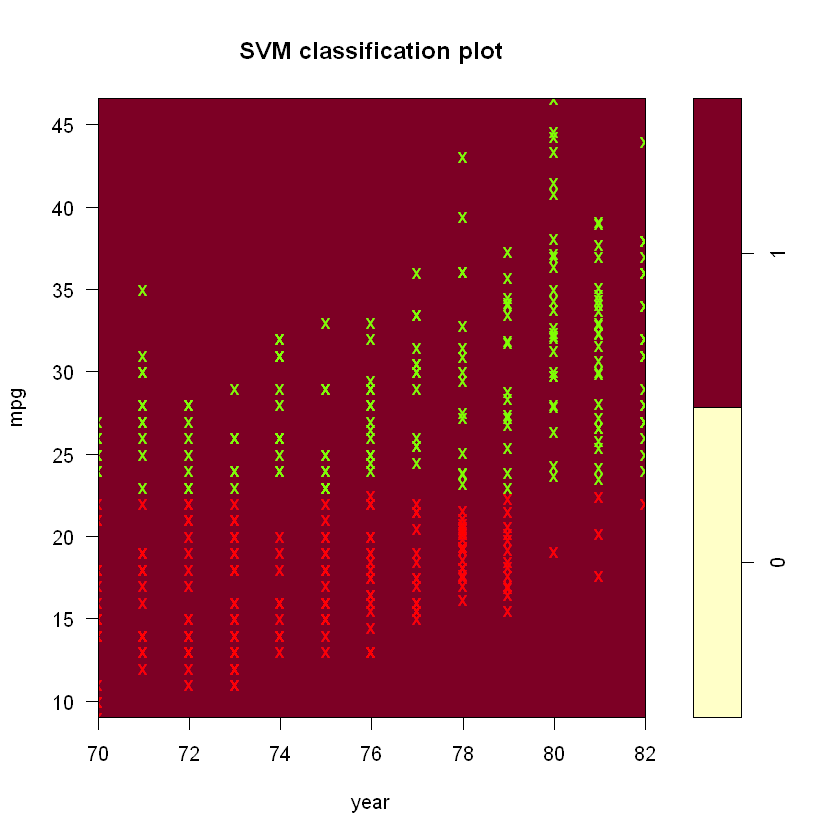

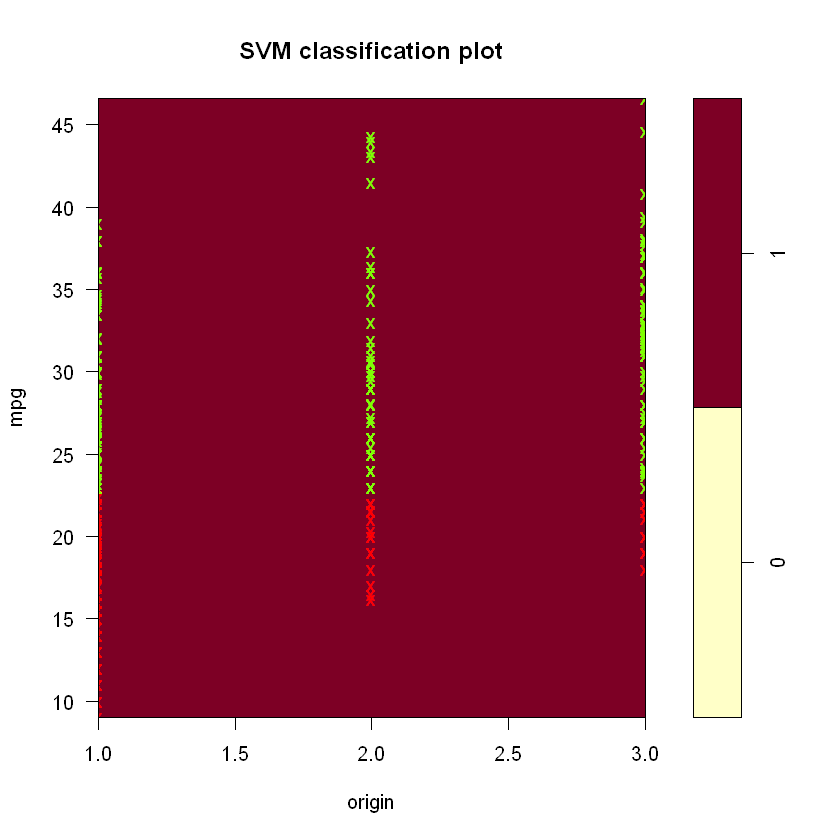

In [14]:
#plot for the polynomial approach
plotpairs(svm.poly)

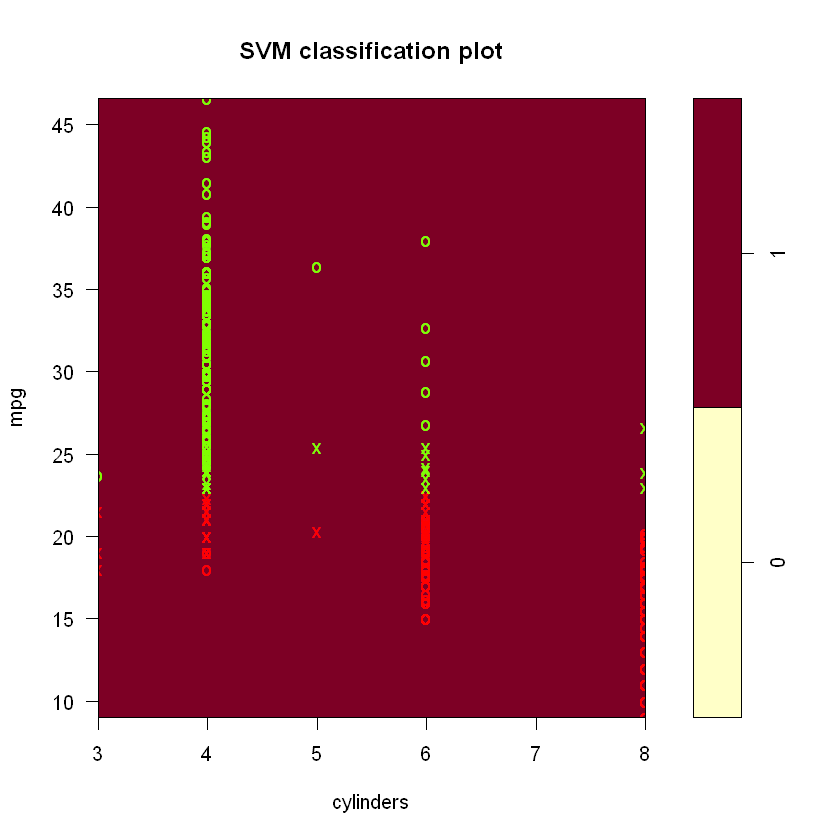

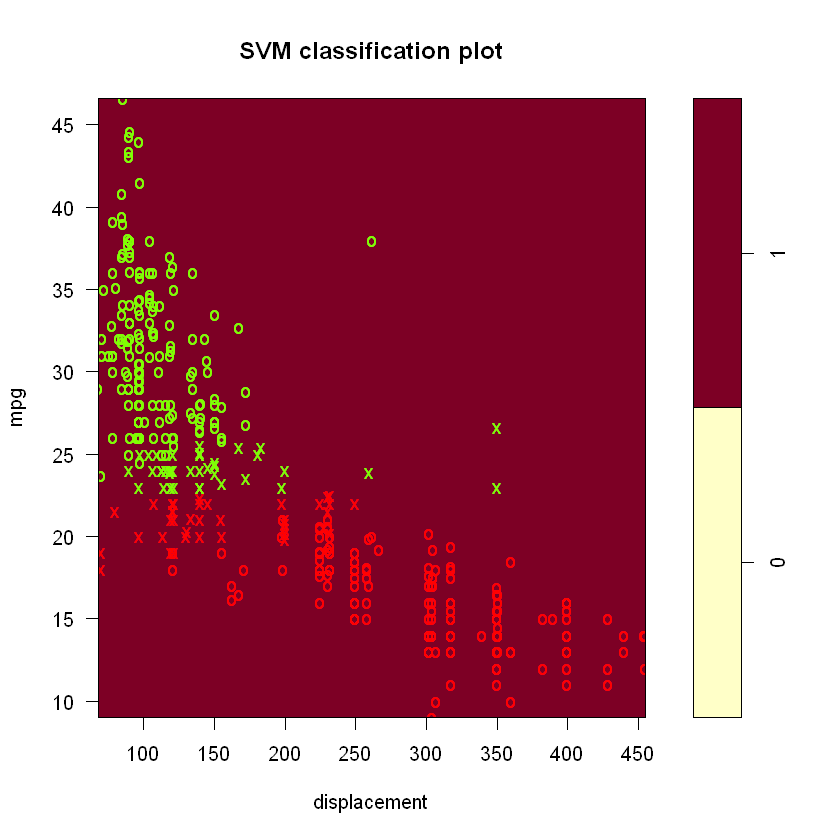

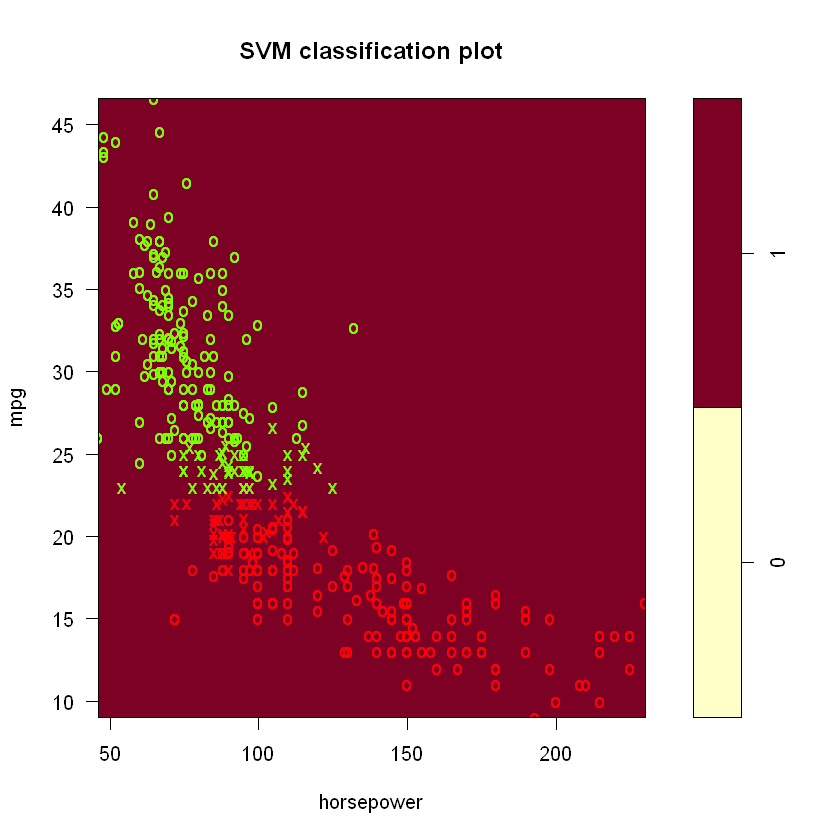

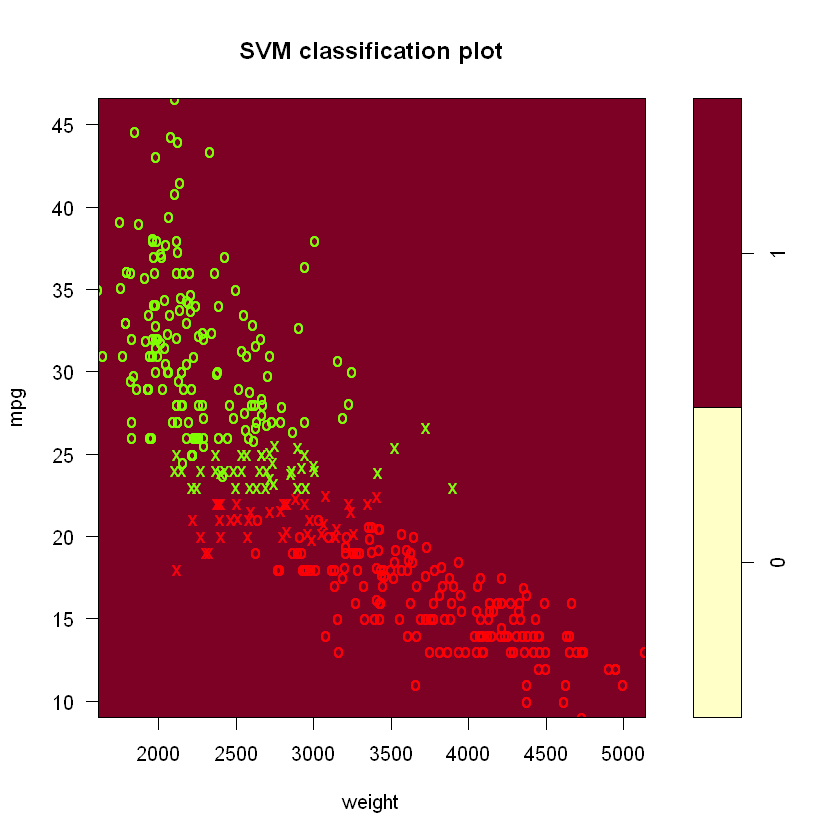

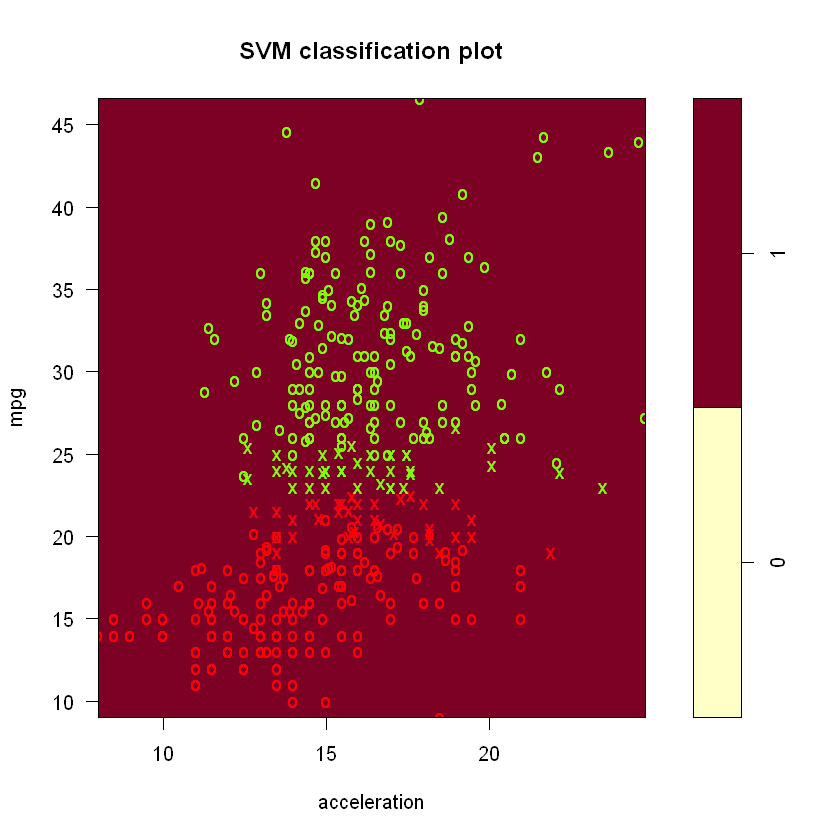

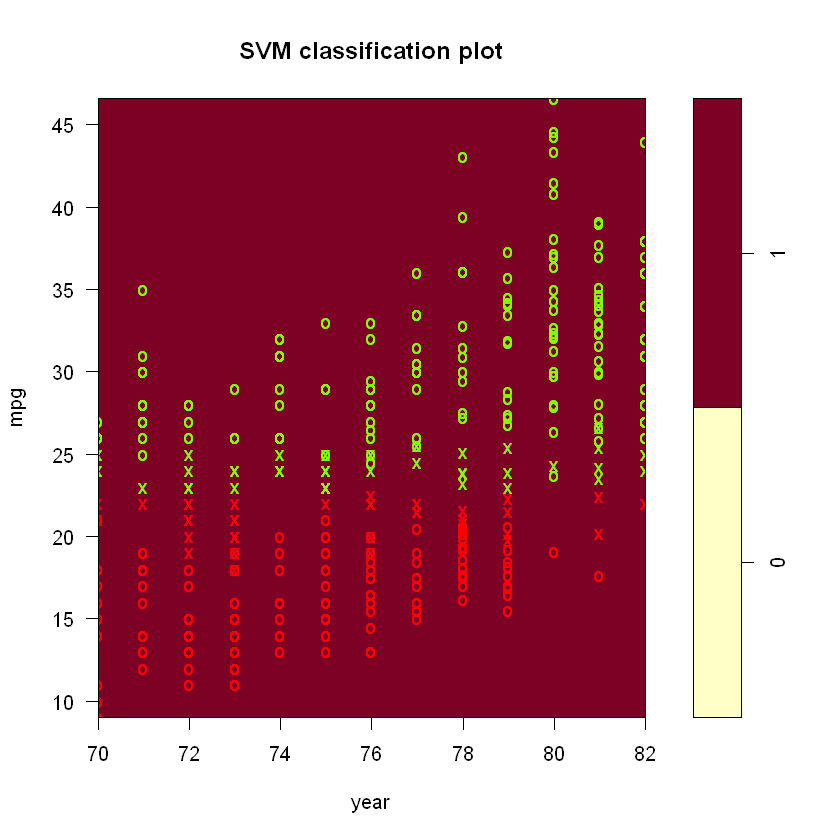

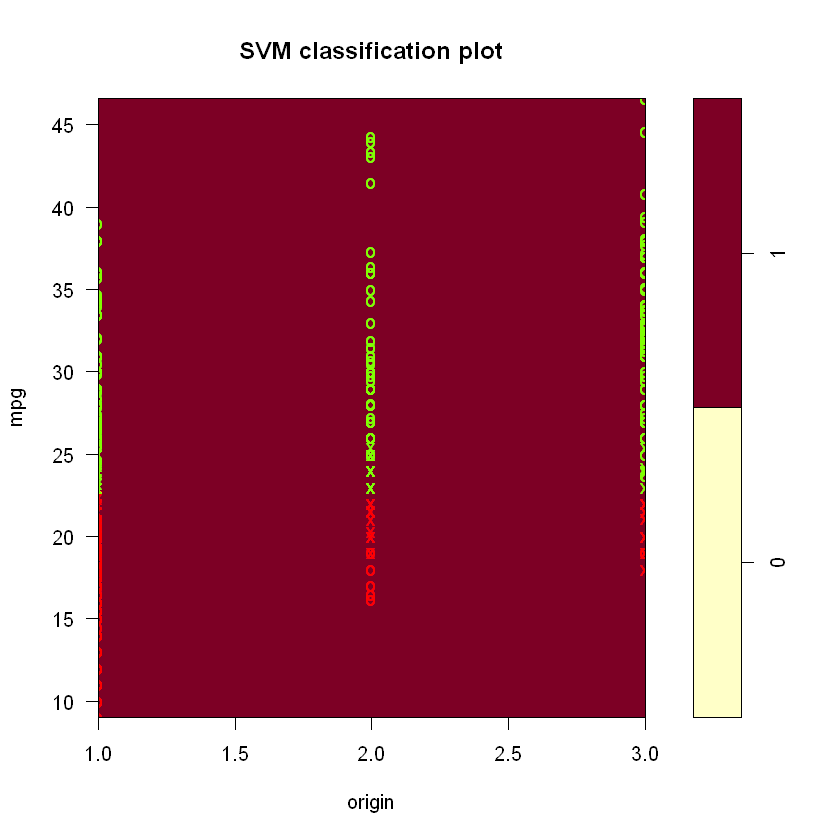

In [15]:
#plot for the Radial approach
plotpairs(svm.radial)

## Solution 5

## (a)

In [16]:
library(ISLR)
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [17]:
# Train-test split
set.seed(1)  # High variance
train_idx <- sample(1:nrow(OJ), 800)
train_OJ <- OJ[train_idx, ]  # 800 obs.
test_OJ <- OJ[-train_idx, ]  #270 obs.

## (b)

In [18]:
#Fit a support vector classifier to the training data using cost=0.01
svm_lin = svm(Purchase ~ ., kernel = "linear", data = train_OJ , cost = 0.01)


In [19]:
#summary of the model
summary(svm_lin)


Call:
svm(formula = Purchase ~ ., data = train_OJ, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




## (c)

In [20]:
#Training error rate
#predict the response
pred <- predict(svm_lin, newdata=train_OJ, type='class')

# Evaluation: confusion matrix
table(pred, train_OJ$Purchase)

    
pred  CH  MM
  CH 420  75
  MM  65 240

In [21]:
#Accuracy
acc = round(mean(pred == train_OJ$Purchase)*100,2)
acc

[1] 82.5

In [22]:
#training error rate
100-acc

[1] 17.5

In [23]:
#Test error rate 
#predict the response
pred <- predict(svm_lin, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred, test_OJ$Purchase)

    
pred  CH  MM
  CH 153  33
  MM  15  69

In [24]:
#Accuracy
acc = round(mean(pred == test_OJ$Purchase)*100,2)
acc

[1] 82.22

In [25]:
#test error rate
100-acc

[1] 17.78

<b>training error rate : 17.5% <br>test error rate:17.78%

## (d)

In [26]:
#Use the tune() function to select an optimal cost
set.seed(1)
tune_OJ = tune(svm, Purchase ~ ., data = train_OJ, kernel = "linear", 
                 ranges = list(cost = c(0.1, 1, 10))) 
        

In [27]:
summary(tune_OJ)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1725 

- Detailed performance results:
  cost   error dispersion
1  0.1 0.17250 0.03162278
2  1.0 0.17500 0.02946278
3 10.0 0.17375 0.03197764


## (e)

In [28]:
#Compute the training and test error rates using this new value for cost
svm_lin = svm(Purchase ~ ., kernel = "linear", data = train_OJ, cost = tune_OJ$best.parameters$cost)

In [29]:
#Training error rate
#predict the response
pred <- predict(svm_lin, newdata=train_OJ, type='class')

# Evaluation: confusion matrix
table(pred, train_OJ$Purchase)

    
pred  CH  MM
  CH 422  69
  MM  63 246

In [30]:
#Accuracy
acc = round(mean(pred == train_OJ$Purchase)*100,2)
acc

[1] 83.5

In [31]:
#training error rate
100-acc


[1] 16.5

In [32]:
#Test error rate 
#predict the response
pred <- predict(svm_lin, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred, test_OJ$Purchase)

    
pred  CH  MM
  CH 155  31
  MM  13  71

In [33]:
#Accuracy
acc = round(mean(pred == test_OJ$Purchase)*100,2)
acc

[1] 83.7

In [34]:
#test error rate
100-acc

[1] 16.3

<b>training error rate : 16.5% <br>test error rate:16.3%

## (f)

In [35]:
# using a support vector machine with a radial kernel. Use the default value for gamma.
set.seed(1)
svm_rad = svm(Purchase ~ ., data =train_OJ, kernel = "radial")

In [36]:
summary(svm_rad)


Call:
svm(formula = Purchase ~ ., data = train_OJ, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




In [37]:
#Training error rate
#predict the response
pred <- predict(svm_rad, newdata=train_OJ, type='class')

# Evaluation: confusion matrix
table(pred, train_OJ$Purchase)

#Accuracy
acc = round(mean(pred == train_OJ$Purchase)*100,2)
acc

#Train error rate
100-acc

    
pred  CH  MM
  CH 441  77
  MM  44 238

[1] 84.88

[1] 15.12

In [38]:
#Test error rate
#predict the response
pred <- predict(svm_rad, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred, test_OJ$Purchase)

#Accuracy
acc = round(mean(pred == test_OJ$Purchase)*100,2)
acc

#Test error rate
100-acc

    
pred  CH  MM
  CH 151  33
  MM  17  69

[1] 81.48

[1] 18.52

<b>training error rate : 15.12% <br>test error rate:18.52%

In [39]:
set.seed(1)
tune_OJ = tune(svm, Purchase ~ ., data = train_OJ, kernel = "radial", 
                 ranges = list(cost = c(0.1, 1, 10),
                 gamma=c(0.5, 1, 2, 3, 4))) 

In [40]:
summary(tune_OJ)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.2125 

- Detailed performance results:
   cost gamma   error dispersion
1   0.1   0.5 0.28250 0.05502525
2   1.0   0.5 0.21375 0.03701070
3  10.0   0.5 0.21250 0.03632416
4   0.1   1.0 0.34500 0.04937104
5   1.0   1.0 0.22625 0.04466309
6  10.0   1.0 0.23000 0.04684490
7   0.1   2.0 0.38625 0.04348132
8   1.0   2.0 0.22750 0.04281744
9  10.0   2.0 0.24000 0.04158325
10  0.1   3.0 0.39375 0.04007372
11  1.0   3.0 0.22625 0.03304563
12 10.0   3.0 0.25375 0.03335936
13  0.1   4.0 0.39375 0.04007372
14  1.0   4.0 0.22750 0.03322900
15 10.0   4.0 0.25500 0.03496029


In [41]:
svm_rad = svm(Purchase ~ ., data = train_OJ, kernel = "radial", cost = tune_OJ$best.parameters$cost)

In [42]:
#Training error rate
#predict the response
pred <- predict(svm_rad, newdata=train_OJ, type='class')

# Evaluation: confusion matrix
table(pred, train_OJ$Purchase)

#Accuracy
acc = round(mean(pred == train_OJ$Purchase)*100,2)
acc

#Train error rate
100-acc

    
pred  CH  MM
  CH 442  73
  MM  43 242

[1] 85.5

[1] 14.5

In [43]:
#Test error rate
#predict the response
pred <- predict(svm_rad, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred, test_OJ$Purchase)

#Accuracy
acc = round(mean(pred == test_OJ$Purchase)*100,2)
acc

#Test error rate
100-acc

    
pred  CH  MM
  CH 154  36
  MM  14  66

[1] 81.48

[1] 18.52

<b>training error rate : 14.5% <br>test error rate:18.52%

## (g)

In [44]:
# using a support vector machine with a polynomial kernel. Set degree=2.
set.seed(1)
svm_poly = svm(Purchase ~ ., data = train_OJ, kernel = "poly", degree = 2)
summary(svm_poly)


Call:
svm(formula = Purchase ~ ., data = train_OJ, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 225 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [45]:
#Training error rate
#predict the response
pred <- predict(svm_poly, newdata=train_OJ, type='class')

# Evaluation: confusion matrix
table(pred, train_OJ$Purchase)

#Accuracy
acc = round(mean(pred == train_OJ$Purchase)*100,2)
acc

#Train error rate
100-acc

    
pred  CH  MM
  CH 449 110
  MM  36 205

[1] 81.75

[1] 18.25

In [46]:
#Test error rate
#predict the response
pred <- predict(svm_poly, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred, test_OJ$Purchase)

#Accuracy
acc = round(mean(pred == test_OJ$Purchase)*100,2)
acc

#Test error rate
100-acc

    
pred  CH  MM
  CH 153  45
  MM  15  57

[1] 77.78

[1] 22.22

<b>training error rate : 18.25% <br>test error rate:22.22%

In [47]:
#Tune the model
set.seed(1)
tune_OJ = tune(svm, Purchase ~ ., data = train_OJ, kernel = "poly", degree = 2, 
               ranges = list(cost = c(0.1, 1, 10)))
summary(tune_OJ)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.18125 

- Detailed performance results:
  cost   error dispersion
1  0.1 0.32125 0.05001736
2  1.0 0.20250 0.04116363
3 10.0 0.18125 0.02779513


In [48]:
svm_poly = svm(Purchase ~ ., data = train_OJ, kernel = "poly", degree = 2, cost = tune_OJ$best.parameters$cost)

In [49]:
#Training error rate
#predict the response
pred <- predict(svm_poly, newdata=train_OJ, type='class')

# Evaluation: confusion matrix
table(pred, train_OJ$Purchase)

#Accuracy
acc = round(mean(pred == train_OJ$Purchase)*100,2)
acc

#Train error rate
100-acc

    
pred  CH  MM
  CH 447  82
  MM  38 233

[1] 85

[1] 15

In [50]:
#Test error rate
#predict the response
pred <- predict(svm_poly, newdata=test_OJ, type='class')

# Evaluation: confusion matrix
table(pred, test_OJ$Purchase)

#Accuracy
acc = round(mean(pred == test_OJ$Purchase)*100,2)
acc

#Test error rate
100-acc

    
pred  CH  MM
  CH 154  37
  MM  14  65

[1] 81.11

[1] 18.89

<b>training error rate : 15% <br>test error rate:18.89%

## (h)

Comparing the overall results,we can conclude that radial approach is the best option with lowest training and test errors